In [34]:
# Question:  Is there a measurable relationship between wages by sector and parental leave?
# Data:  1. Wages by Sector, 2. Parental Leave by Type (paid/unpaid) & Employee gender
# Analysis:  Bar Graph, Pie Graph, Linear Regression, Seaborn Correlation
# Conclusion:  For Unpaid Manternity Leave, the regresssion and correlation calculations point to a mild negative relationship to sector/wage.

In [1]:
#library imports 
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from pathlib import Path


In [4]:
# Create Wages dataframe from sector average wages data
# GICS_sectors = list of sectors
# wages = average wage by sector

GICS_sectors = ['Energy',
               'Materials',
               'Consumer Staples',
               'Consumer Discretionary',
               'Industrials',
               'Health Care',
               'Real Estate',
               'Financials',
               'Information Technology',
               'Communication Services',
               'Utilities']
wages = [106790,51410,46280,67230,49140,63710,58530,88270,105280,47820,64760]
data = {'GICS_Sector':GICS_sectors,'Average_wage':wages}
average_wage_df = pd.DataFrame.from_dict(data)

# View all rows of average_wage_df dataframe
average_wage_df

,GICS_Sector,Average_wage
0,Energy,106790
1,Materials,51410
2,Consumer Staples,46280
3,Consumer Discretionary,67230
4,Industrials,49140
5,Health Care,63710
6,Real Estate,58530
7,Financials,88270
8,Information Technology,105280
9,Communication Services,47820


In [5]:
# Create Parental Leave dataframe from csv file with leave data by gender/paid/unpaid

parental_leave_df = pd.read_csv(Path('Resources/Parent_Leave_Cleaned.csv'))

# View first 5 rows of data
parental_leave_df.head()

,Company,Industry,Sector,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave
0,Epsilon,Advertising,Communication Services,6.0,6.0,6.0,6.0
1,The Walt Disney Company,Arts & Entertainment,Communication Services,5.0,4.0,4.5,4.0
2,Guild Education,Business Services: Other,Industrials,14.0,0.0,8.0,4.0
3,WeWork,Business Services: Other,Real Estate,14.0,2.0,16.0,4.0
4,Randstad USA,Business Services: Staffing & Outsourcing,Industrials,5.0,7.0,0.0,0.0


In [6]:
# Create average Parental Leave by Sector to prepare dataframes for analysis

leave_by_sector_df = parental_leave_df.groupby(['Sector']).mean()

# View All rows of dataframe

leave_by_sector_df.sort_values(['Sector'], ascending=[True])

,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave
Sector,,,,
Communication Services,11.405844,5.822917,7.500000,6.666667
Consumer Discretionary,10.288274,7.403915,5.242424,18.000000
Consumer Staples,10.458333,6.689394,7.666667,8.400000
Energy,9.785714,6.545455,2.000000,8.000000
Financials,11.926778,6.473214,8.650943,4.222222
Health Care,8.382979,5.587786,4.458333,4.285714
Industrials,9.791667,7.194581,6.173077,6.818182
Information Technology,12.812937,5.979705,9.475410,10.333333
Materials,9.528571,7.838710,4.400000,8.000000


In [7]:
# Sort average wage by sector dataframe and set as the index

wages_df = average_wage_df.sort_values(['GICS_Sector'], ascending=[True]).set_index('GICS_Sector')

# View ALL rows of dataframe

wages_df

,Average_wage
GICS_Sector,
Communication Services,47820
Consumer Discretionary,67230
Consumer Staples,46280
Energy,106790
Financials,88270
Health Care,63710
Industrials,49140
Information Technology,105280
Materials,51410


In [8]:
# Create carve out dataframe for Unpaid Maternity Leave

unpaid_maternity_df = parental_leave_df.loc[:,['Sector', 'Unpaid Maternity Leave']]

# Use describe to determine the average leave

unpaid_maternity_df.describe()

,Unpaid Maternity Leave
count,1494.000000
mean,6.628849
std,9.274953
min,0.000000
25%,0.000000
50%,4.000000
75%,10.000000
max,52.000000


In [8]:
# Get descriptive stats on the Parental Leave dataframe, average (mean)

parental_leave_df.describe()

,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave
count,1601.000000,1494.000000,289.000000,64.000000
mean,10.909119,6.628849,7.332180,7.734375
std,8.024514,9.274953,6.817591,6.831863
min,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,2.000000,2.000000
50%,11.000000,4.000000,6.000000,6.000000
75%,12.000000,10.000000,12.000000,12.000000
max,52.000000,52.000000,51.000000,29.000000


<AxesSubplot:title={'center':'Parental Leave Weeks'}>

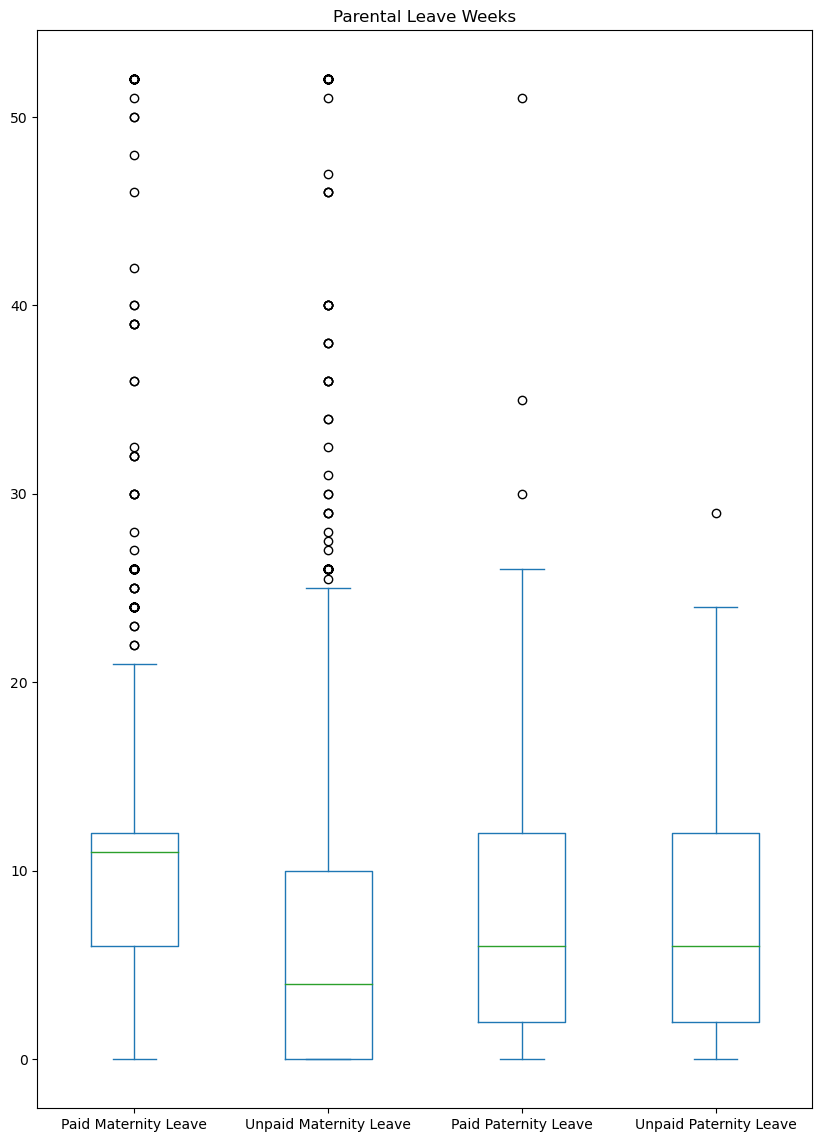

In [13]:
# Plot boxplot for Parental Leave averages

parental_leave_df.plot(
    kind='box', 
    title='Parental Leave Weeks',
    figsize=(10,14))

In [19]:
# Calculate average leave by sector

avg_leave_by_sector = parental_leave_df.groupby('Sector').mean()

    # to calculate the average for a single column, use the following -->
    # avg_by_sector = parental_leave_df.groupby('Sector')['Unpaid Maternity Leave'].mean()

# View ALL leave by sector averages

avg_leave_by_sector

,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave
Sector,,,,
Communication Services,11.405844,5.822917,7.500000,6.666667
Consumer Discretionary,10.288274,7.403915,5.242424,18.000000
Consumer Staples,10.458333,6.689394,7.666667,8.400000
Energy,9.785714,6.545455,2.000000,8.000000
Financials,11.926778,6.473214,8.650943,4.222222
Health Care,8.382979,5.587786,4.458333,4.285714
Industrials,9.791667,7.194581,6.173077,6.818182
Information Technology,12.812937,5.979705,9.475410,10.333333
Materials,9.528571,7.838710,4.400000,8.000000


<AxesSubplot:title={'center':'average leave by sector'}, xlabel='Sector', ylabel='Weeks'>

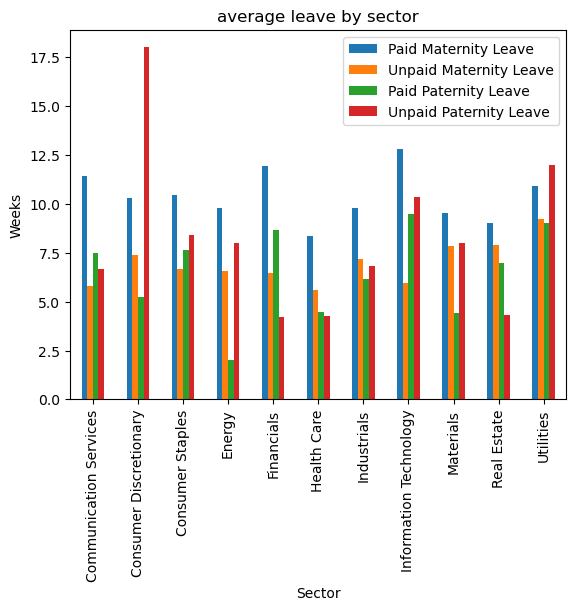

In [23]:
# Graph average leave by sector

avg_leave_by_sector.plot(kind='bar', title='average leave by sector', ylabel='Weeks')

<AxesSubplot:title={'center':'average leave by sector'}, xlabel='GICS_Sector', ylabel='Weeks'>

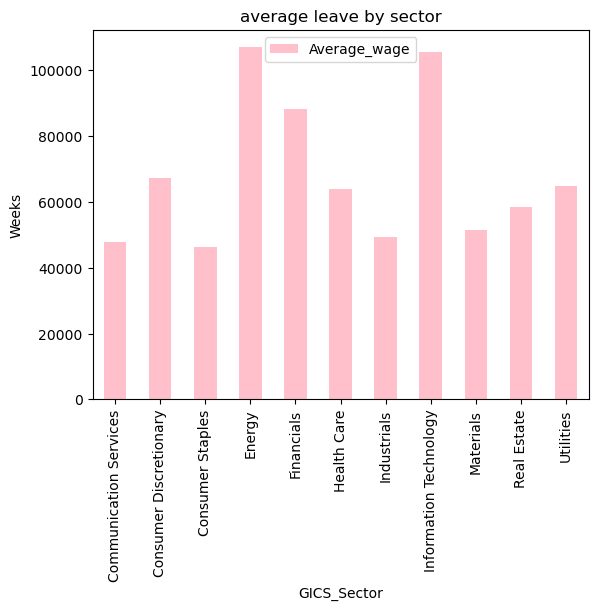

In [25]:
# Graph average leave by sector

wages_df.plot(kind='bar', title='average leave by sector', ylabel='Weeks', color='pink')

In [20]:
# MERGE dataframes:  
        # leave_by_sector_df
        # wages_df

join = leave_by_sector_df.join(wages_df)
join


,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave,Average_wage
Sector,,,,,
Communication Services,11.405844,5.822917,7.500000,6.666667,47820
Consumer Discretionary,10.288274,7.403915,5.242424,18.000000,67230
Consumer Staples,10.458333,6.689394,7.666667,8.400000,46280
Energy,9.785714,6.545455,2.000000,8.000000,106790
Financials,11.926778,6.473214,8.650943,4.222222,88270
Health Care,8.382979,5.587786,4.458333,4.285714,63710
Industrials,9.791667,7.194581,6.173077,6.818182,49140
Information Technology,12.812937,5.979705,9.475410,10.333333,105280
Materials,9.528571,7.838710,4.400000,8.000000,51410


<AxesSubplot:title={'center':'average leave by sector'}, xlabel='Sector', ylabel='Weeks'>

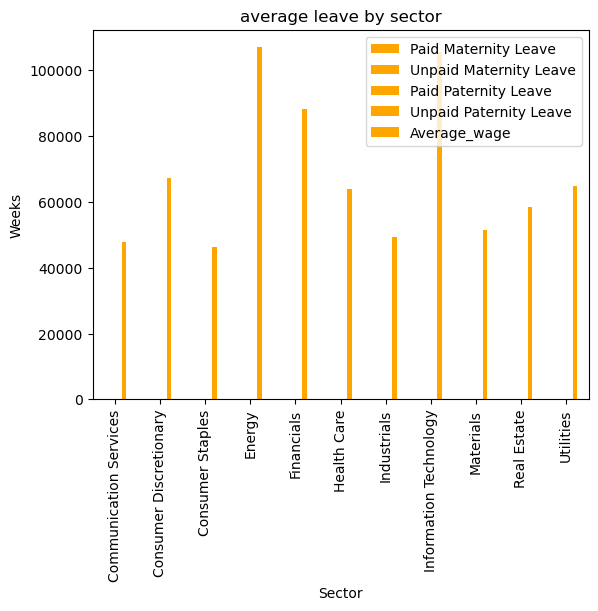

In [22]:
join.plot(kind='bar', title='average leave by sector', ylabel='Weeks', color='orange')

In [13]:
#Pearson's correlation between 2 variables

# pearson = spearmanr(avgerage_wage_df, parental_leave_df)

<AxesSubplot:>

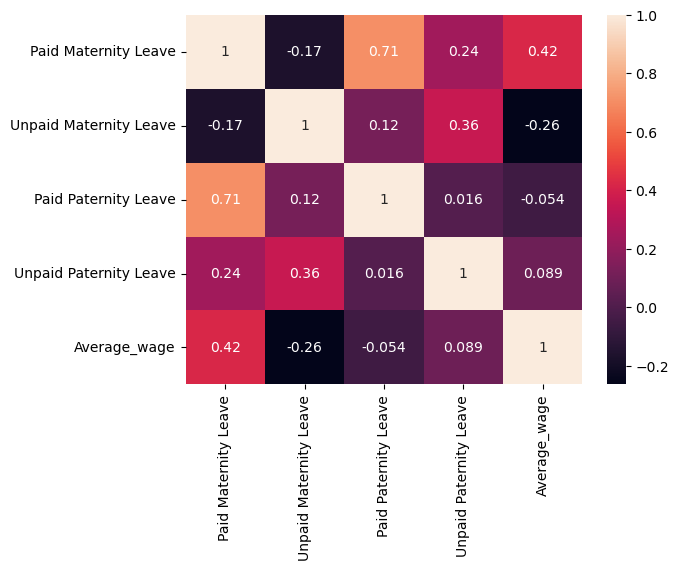

In [22]:
# SEABORN Correlation

import seaborn as sns
corr = join.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

In [29]:
# regression draft

import numpy as np
from sklearn.linear_model import LinearRegression


array2 = join['Unpaid Maternity Leave'].to_numpy()
array = join['Average_wage'].to_numpy()
array = array.reshape(-1, 1)
array2 = array2.reshape(-1, 1)



model = LinearRegression().fit(array, array2)
r_sq = model.score(array, array2)
print(f"coefficient of determination: {r_sq}")




coefficient of determination: 0.06951352305250413


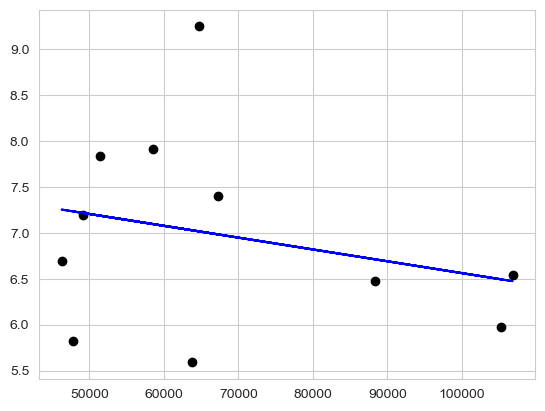

In [45]:
#plot regression scatter

import matplotlib.pyplot as plt

# array = array.reshape(-1, 1)
# a, b = np.polyfit(array, array2, 1)
# plt.plot(array, a*array+b) 


leave_y_pred = model.predict(array)
plt.scatter(array, array2, color="black")
plt.plot(array, leave_y_pred, color="blue")

In [20]:
# sector by employee


total_dict = {'Energy':{"Mining, quarrying, and oil and gas extraction":{"Total":603,
                                                                        "Female":93,
                                                                        "Male":510}
                        },
               'Materials':{"Agriculture, forestry, fishing, and hunting":{"Total":2292/2,
                                                                          "Female":642/2,
                                                                          "Male":1650/2}},
               'Consumer Staples':{"Agriculture, forestry, fishing, and hunting":{"Total":2292/2,
                                                                          "Female":642/2,
                                                                          "Male":1650/2},
                                   "Nondurable goods manufacturing":{"Total":5369,
                                                                    "Female":1945,
                                                                    "Male":3424}},
               'Consumer Discretionary':{"Durable goods manufacturing":{"Total":9349,
                                                                       "Female":2357,
                                                                       "Male":6992},
                                         "Wholesale and retail trade":{"Total":19623,
                                                                      "Female":8896,
                                                                      "Male":10727},
                                         "Educational services":{"Total":13521,
                                                                "Female":9349,
                                                                "Male":4172},
                                         "Accommodation and food services":{"Total":9739,
                                                                           "Female":5108,
                                                                           "Male":4631}},
               'Industrials':{"Construction": {"Total":11271,
                                              "Female":1241,
                                              "Male":10030},
                              "Professional and business services": {"Total":19296/2,
                                                                    "Female":8214/2,
                                                                    "Male":11082/2}},
               'Health Care':{"Health care and social assistance":{"Total":21204,
                                                                  "Female":16446,
                                                                  "Male":4757}},
               'Real Estate':{"Real estate and rental and leasing":{"Total":3229,
                                                                   "Female":1586,
                                                                   "Male":1642}},
               'Financials':{"Finance and insurance":{"Total":7497,
                                                     "Female":4002,
                                                     "Male":3495},
                            "Professional and business services": {"Total":19294/2,
                                                                    "Female":8214/2,
                                                                    "Male":11080/2}},
               'Information Technology':{"Information":{"Total":2721,
                                                       "Female":1069,
                                                       "Male":1652}},
               'Communication Services':{"Arts, entertainment, and recreation":{"Total":2896,
                                                                               "Female":1575,
                                                                               "Male":1320}},
               'Utilities':{"Transportation and utilities":{"Total":9377,
                                                           "Female":2325,
                                                           "Male":7052}}}



In [21]:
# % of employee gender by sector

ratio_list = []
for i in total_dict.keys():
    for j in total_dict[i].keys():
        for x in total_dict[i][j].keys():
            gender_ratio = total_dict[i][j]["Female"]/total_dict[i][j]["Total"]
            ratio_list.append(gender_ratio)
            print(f'The gender_ratio of industry {total_dict[i]} is {gender_ratio}')





The gender_ratio of industry {'Mining, quarrying, and oil and gas extraction': {'Total': 603, 'Female': 93, 'Male': 510}} is 0.15422885572139303
The gender_ratio of industry {'Mining, quarrying, and oil and gas extraction': {'Total': 603, 'Female': 93, 'Male': 510}} is 0.15422885572139303
The gender_ratio of industry {'Mining, quarrying, and oil and gas extraction': {'Total': 603, 'Female': 93, 'Male': 510}} is 0.15422885572139303
The gender_ratio of industry {'Agriculture, forestry, fishing, and hunting': {'Total': 1146.0, 'Female': 321.0, 'Male': 825.0}} is 0.2801047120418848
The gender_ratio of industry {'Agriculture, forestry, fishing, and hunting': {'Total': 1146.0, 'Female': 321.0, 'Male': 825.0}} is 0.2801047120418848
The gender_ratio of industry {'Agriculture, forestry, fishing, and hunting': {'Total': 1146.0, 'Female': 321.0, 'Male': 825.0}} is 0.2801047120418848
The gender_ratio of industry {'Agriculture, forestry, fishing, and hunting': {'Total': 1146.0, 'Female': 321.0, 'Ma

In [17]:
join.columns


Index(['Paid Maternity Leave', 'Unpaid Maternity Leave',
       'Paid Paternity Leave', 'Unpaid Paternity Leave', 'Average_wage'],
      dtype='object')

In [ ]:
#scatter matrix

pd.scatter_matrix(join, alpha = 0.3, figsize = (14,8), disagonal = 'kde');

In [ ]:
#Numpy Correlation calculations
# Pearson's r Value >0 = positive linear relationship, <0 = negative relationship
# spearman 

import numpy as np
import scipy.stats

scipy.stats.pearsonr(join['Average_wage'], join['Unpaid Maternity Leave'])


In [ ]:
scipy.stats.spearmanr(join['Average_wage'], join['Unpaid Maternity Leave'])

In [ ]:
scipy.stats.kendalltau(join['Average_wage'], join['Unpaid Maternity Leave'])